In [57]:
#Import Necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import gmaps
import pprint
from config import gkey
from scipy.stats import linregress
import scipy.stats as sts

In [58]:
#Import CSV
file = 'clean.csv'

In [59]:
#Convert CSV to to Dataframe
df = pd.read_csv(file)

In [60]:
#Find correlation coefficient for all variables
df.corr()

,PropertyZip,ParcelSize,ValueofHome,YearBuilt,NumberOfStories,AdjSquareFeet,BCEG,DistancetoCoast,PoliceID,Crime,FireID,DistancetoFireDepartment,DistancetoSinkhole,SinkholeLatitude,SinkholeLongitude,LocationWindSpeed,FloodZoneRiskLevel
PropertyZip,1.000000,0.017801,0.061353,0.082640,-0.215459,0.005285,-0.194935,-0.070994,0.186592,NaN,-0.187560,-0.066067,-0.222544,-0.472261,-0.019296,0.126725,NaN
ParcelSize,0.017801,1.000000,0.052753,-0.123119,-0.058345,0.179059,0.236181,-0.061958,-0.165493,NaN,-0.129023,0.251573,0.028374,0.011586,-0.014962,-0.077004,NaN
ValueofHome,0.061353,0.052753,1.000000,0.149435,0.199246,0.560435,0.050012,-0.011211,-0.114202,NaN,-0.131459,0.079629,0.277478,-0.344957,0.164263,0.310707,NaN
YearBuilt,0.082640,-0.123119,0.149435,1.000000,0.396607,0.192882,-0.554844,-0.138658,0.144768,NaN,-0.091575,0.181738,0.132784,-0.033124,-0.021585,-0.036748,NaN
NumberOfStories,-0.215459,-0.058345,0.199246,0.396607,1.000000,0.248371,-0.461404,0.099776,0.200625,NaN,0.227360,0.044682,0.355265,0.257048,-0.414405,0.058729,NaN
AdjSquareFeet,0.005285,0.179059,0.560435,0.192882,0.248371,1.000000,-0.093761,-0.092644,-0.083517,NaN,-0.119969,0.031648,0.197191,-0.026036,-0.013187,0.024074,NaN
BCEG,-0.194935,0.236181,0.050012,-0.554844,-0.461404,-0.093761,1.000000,0.069726,-0.048217,NaN,-0.061787,-0.035422,0.101232,0.003730,0.079188,0.073696,NaN
DistancetoCoast,-0.070994,-0.061958,-0.011211,-0.138658,0.099776,-0.092644,0.069726,1.000000,0.068050,NaN,0.157643,-0.076402,0.006012,0.106500,-0.241822,-0.019148,NaN
PoliceID,0.186592,-0.165493,-0.114202,0.144768,0.200625,-0.083517,-0.048217,0.068050,1.000000,NaN,0.776803,0.009440,0.036613,0.027879,-0.244201,-0.000578,NaN
Crime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
#Filter the appropriate columns needed for Analysis to make dataset concise
new_df = df[['Id','OwnerState','StateParcelId','ParcelSize','ValueofHome',
             'YearBuilt','TypeOfResidence','NumberOfStories','AdjSquareFeet']]
new_df

,Id,OwnerState,StateParcelId,ParcelSize,ValueofHome,YearBuilt,TypeOfResidence,NumberOfStories,AdjSquareFeet
0,12009f31026acc440,NC,C15-000-035-4368-3,10890.0,360350.0,2001.0,SINGLE FAMILY,2.0,3716.0
1,120112bfc77a87376,VA,C16-000-107-5040-4,2328.0,228680.0,2003.0,ATTACHED RESIDENTIAL,NaN,1633.0
2,12081776a04b281f4,VA,C51-000-535-8660-8,44.0,135000.0,1980.0,CONDO STACKED,NaN,1254.0
3,12103fabafeea9fb7,VA,C62-000-778-7949-2,NaN,87660.0,1959.0,CONDO STACKED,1.0,445.0
4,120213b0f5f17e3d1,SC,C21-000-189-4508-9,NaN,663090.0,1991.0,CONDO STACKED,NaN,1263.0
...,...,...,...,...,...,...,...,...,...
223,12086e1ddd12521cd,SC,C23-000-278-7237-3,3473.0,329160.0,1993.0,SINGLE FAMILY,NaN,1957.0
224,120861813f1294d56,VA,C23-000-207-1780-7,9000.0,924061.0,1941.0,SINGLE FAMILY,NaN,3056.0
225,12089ed366ee68b8e,NC,C55-000-585-3872-9,6650.0,274291.0,1929.0,SINGLE FAMILY,NaN,783.0
226,1211544028709F1DD,VA,C68-000-867-0448-3,NaN,267400.0,1971.0,CONDO ROW,NaN,1114.0


In [62]:
#MakeSureNoNullValues
new_df['ValueofHome'].unique()

array([ 360350.,  228680.,  135000.,   87660.,  663090.,  298880.,
        141668.,  161169.,  302070.,  122040.,  177505.,  277190.,
         62414.,  202770.,  259580.,  152459.,   88850.,   77100.,
        218245.,  363580.,  206570.,  155519.,   53098.,  746751.,
        371402.,  354430.,  299587.,   51000.,   90660.,  311180.,
        585440.,  162000.,   99174.,  219010.,  125900.,  279900.,
        166345.,   92000.,  202800.,   47530.,  184821.,   68260.,
         84700.,  798030.,   29700.,  141290.,   78353.,  182170.,
        270230.,  101568.,  342380.,  216104.,  130441.,  271407.,
        263500.,  310459.,  152573.,  161550.,  167130.,  128160.,
        320650.,  370083.,  156660.,  138127.,  133900.,   82850.,
        219652.,  262320.,  301060.,   68328.,   66690.,  294724.,
         42779.,  117354.,  164566.,  195489.,  167948.,  396226.,
        241436.,   58910.,  140513.,   73500.,   75000.,  231832.,
         57900.,  173283.,  326520.,  226750.,  136104.,  2646

Correlation (R^2) of Home Value versus Square Footage is 0.31
Linear Regresssion equation is.....y = 109.74x + 41644.81
The Correlation between Square Footage and Home Value is weak when considering the entire state of Florida


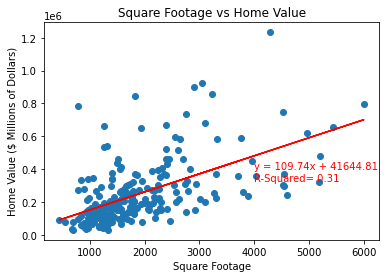

In [63]:
#Get specific correlation coefficient betweeen AdjSqFt and Value of Home
r_asf = new_df['ValueofHome'].corr(new_df['AdjSquareFeet'])
r2_asf = round(r_asf * r_asf,2)

print(f'Correlation (R^2) of Home Value versus Square Footage is {r2_asf}')

x_values = new_df['AdjSquareFeet']
y_values = new_df['ValueofHome']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'Linear Regresssion equation is.....{line_eq}')

#Graph figure on scatterplot using Matplotlib. Inclusive of linear regression and correlation.

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color= 'r')
plt.title('Square Footage vs Home Value')
plt.xlabel('Square Footage')
plt.ylabel('Home Value ($ Millions of Dollars)')
plt.annotate(line_eq,(4000,400000),color = 'r')
plt.annotate(f'R-Squared= {r2_asf}', (4000,325000), color = 'r')
print(f'The Correlation between Square Footage and Home Value is weak when considering the entire state of Florida')

#Save the figure as PNG
plt.savefig('SquareFootageScatter.png')

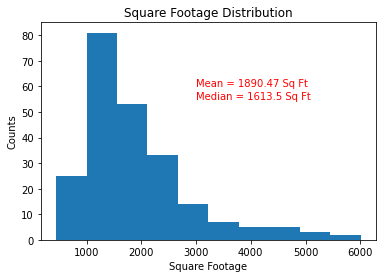

<Figure size 432x288 with 0 Axes>

In [64]:
#Create Histogram to show distribution of Square Footage

plt.hist(new_df['AdjSquareFeet'])
plt.title('Square Footage Distribution')
plt.xlabel('Square Footage')
plt.ylabel('Counts')

mean_f = round(new_df['AdjSquareFeet'].mean(),2)
median_f = round(new_df['AdjSquareFeet'].median(),2)

mean = f'Mean = {mean_f} Sq Ft'
median = f'Median = {median_f} Sq Ft'


plt.annotate(mean,(3000,60),color = 'r')
plt.annotate(median, (3000,55), color = 'r')
plt.show()

#Save as PNG
plt.savefig('SquareFootageHistogram.png')


In [65]:
#Start Gathering appropriate data to create heatmap showing where the most valuable homes are
#and where vacationers like to go

In [66]:
#Define your target cities for GMAPS Api. Need to make sure to add the State of Florida
target_cities = df['PropertyCity'] + ', Florida'

In [67]:
#Create Empty Lists for Latitude and Longtitude that will be fed by for loop. Later to be used with API

Latitude = []
Longitude = []

#Create for loop to take each city in the target_cities variable and return lat and long to empty lists above

for city in target_cities:
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(city, gkey)
    geo_data = requests.get(target_url).json()
    lat = geo_data["results"][0]["geometry"]["location"]["lat"]
    lng = geo_data["results"][0]["geometry"]["location"]["lng"]
    Latitude.append(lat)
    Longitude.append(lng)



In [68]:
#Create dataframe to be used for Heatmap
heatmap_df = pd.DataFrame({'Lat': Latitude,
                           'Lng': Longitude,
                           'Home Value': df['ValueofHome']})
heatmap_df

,Lat,Lng,Home Value
0,28.083627,-80.608109,360350.0
1,25.986076,-80.303560,228680.0
2,27.498928,-82.574819,135000.0
3,27.767601,-82.640291,87660.0
4,26.142036,-81.794810,663090.0
...,...,...,...
223,25.819542,-80.355330,329160.0
224,25.790654,-80.130045,924061.0
225,30.669682,-81.462592,274291.0
226,27.336435,-82.530653,267400.0


In [69]:
#Determine Lat/Long Locations as well as the weight (home values) for the heatmap.
locations = heatmap_df[["Lat", "Lng"]].astype(float)
home_value = heatmap_df["Home Value"].astype(float)

In [70]:
#Configure gmaps
gmaps.configure(api_key=gkey)

In [71]:
#Map heatmap. Pick appropriate max_intensity and point_radius for visualization purposes

fig = gmaps.figure()


heat_layer = gmaps.heatmap_layer(locations, weights=home_value, 
                                 dissipating=False, max_intensity=1000000,
                                 point_radius = 0.08)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))